## Check Test Dataset prediction results

In [6]:
import numpy as np

Y_pred_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models/divided_dataset/straight_model/mean_two_landmarks/"

Y_test_pred_file = "bestVal_straight_model_divided_176x88x48_y_test.npy"
Y_test_file = "Y_test_MTL_gt.npy"
# test_y_pred_file = "bestVal_first_model_y_test.npy"

Y_test_pred_path = Y_pred_dir + Y_test_pred_file
Y_test_pred = np.load(Y_test_pred_path)

Y_test_path = Y_pred_dir + Y_test_file
Y_test_read = np.load(Y_test_path)

In [7]:
res_test = np.load(f"{Y_pred_dir}res_test.npy")

## Check the difference between Predictions and Ground Truth

In [4]:
Y_test_centre_pred_org = Y_test_pred * res_test / 0.15
np.save("/Volumes/Shawn_HDD/PhD/Project/Date/bestVal_straight_model_divided_176_88_48_mean_two_landmarks_MTL_pred_org", Y_test_centre_pred_org)

### Ground Truth points and Prediction points distance

In [8]:
import tensorflow as tf

# 1. Total error distance
# 2. Maximum one point's error distance
# 3. If it can involve the Ground Truth points
# 4. If it can involve the Target Area

# 1. Total error distance
err_diff = (Y_test_read - Y_test_pred) * res_test
square_err_diff = tf.pow(err_diff, 2)
sum_square_err_diff = tf.reduce_sum(square_err_diff, axis=[1, 2])

In [9]:
min_err_idx = np.argmin(sum_square_err_diff, axis=0)
max_err_idx = np.argmax(sum_square_err_diff, axis=0)
print(f"Min[{min_err_idx}]: {sum_square_err_diff[min_err_idx]}")
print(f"Max[{max_err_idx}]: {sum_square_err_diff[max_err_idx]}")
print(f"Mean: {np.mean(sum_square_err_diff)}")

In [11]:
print(Y_test_read[365])
print(Y_test_pred[365])

In [13]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

axs[0][0].hist(sum_square_err_diff, 20)
axs[0][0].set_xlabel("sum square err diff")

axs[0][1].hist(err_diff[:, 0, 0], 20)
axs[0][1].set_xlabel("x: err diff")

axs[1][0].hist(err_diff[:, 0, 1], 20)
axs[1][0].set_xlabel("y: err diff")

axs[1][1].hist(err_diff[:, 0, 2], 20)
axs[1][1].set_xlabel("z: err diff")

pyplot.show()


In [22]:
# create "random" translation value (dx, dy, dz)

import numpy as np

normal_bias_array = np.zeros((2000, 1, 3))
normal_bias_array[:, 0, 0] = np.random.normal(0., 0.3, 2000)
normal_bias_array[:, 0, 1] = np.random.normal(0., 0.3, 2000)
normal_bias_array[:, 0, 2] = np.random.normal(0., 0.3, 2000)
random_trans_array = np.repeat(err_diff, 5, axis=0)
np.random.shuffle(random_trans_array)
random_trans_array = random_trans_array + normal_bias_array

In [23]:
np.save("crop_normal_bias_array", random_trans_array)

In [25]:
random_trans_array_voxel = (random_trans_array / 0.15).astype('int')

print("x max: ", np.max(random_trans_array_voxel[:, 0, 0]))
print("x min: ", np.min(random_trans_array_voxel[:, 0, 0]))
print("y max: ", np.max(random_trans_array_voxel[:, 0, 1]))
print("y min: ", np.min(random_trans_array_voxel[:, 0, 1]))
print("z max: ", np.max(random_trans_array_voxel[:, 0, 2]))
print("z min: ", np.min(random_trans_array_voxel[:, 0, 2]))

In [26]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

# axs[0][0].hist(sum_square_err_diff, 20)
# axs[0][0].set_xlabel("sum square err diff")

axs[0][1].hist(random_trans_array[:, 0, 0], 20)
axs[0][1].set_xlabel("x: square err diff")

axs[1][0].hist(random_trans_array[:, 0, 1], 20)
axs[1][0].set_xlabel("y: square err diff")

axs[1][1].hist(random_trans_array[:, 0, 2], 20)
axs[1][1].set_xlabel("z: square err diff")

pyplot.show()

In [9]:
import Functions.MyDataset as MyDataset

idx = max_err_idx

pat_names = MyDataset.get_pat_names()
test_pat_idx = MyDataset.get_pat_splits(static=True)[2] # 0: train, 1: val, 2: test

test_pt_idx = np.floor(idx / 100).astype(int)
pt_aug_id = np.floor(idx % 100 / 2).astype(int) + 1

pat_name = pat_names[test_pat_idx[test_pt_idx]]

print(f"Patient {pat_name}, Aug Id: {pt_aug_id}")

In [21]:
## Check the cropped results
import numpy as np
import Functions.MyDataset as MyDataset
import Functions.Visualization as Visualization

import importlib

importlib.reload(Visualization)

aug_dir = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/original_augmentation_data/"
pt_aug_path = aug_dir + pat_name + "_aug_" + str(pt_aug_id) + ".mat"

pixel_space = [0.15, 0.15, 0.15]

pt_aug_volume, pt_aug_pts, _ = MyDataset.load_mat_data(pt_aug_path)

# # Ground Truth
#
# Visualization.show_two_centres(pt_aug_volume, pt_left_centre, pt_right_centre, pixel_space)
# # Prediction on original volumes
# Visualization.show_two_centres(pt_aug_volume, , , pixel_space)

In [ ]:
importlib.reload(Visualization)

# Ground Truth
centres = np.mean(pt_aug_pts.reshape((2,2,3)), axis=1)

Visualization.show_two_centres(pt_aug_volume, centres, pixel_space)

In [ ]:
# Prediction on original volumes
Y_test_pred_org = Y_test_pred * res_test / 0.15
Visualization.show_two_centres(pt_aug_volume, np.squeeze(Y_test_pred_org[[160,161]]), pixel_space)

### Ground Truth points to the Cropped Volume's border distance

In [25]:
import Functions.MyCrop as MyCrop

anchor = centres[1]
anchor_pred = Y_test_pred_org[idx, 0]

crop_s = ((45, 45), (45, 45), (45, 45))
d = MyCrop.distance_from_border(pt_aug_volume.shape, pt_aug_pts[2:4], anchor, crop_size=crop_s)
d_pred = MyCrop.distance_from_border(pt_aug_volume.shape, pt_aug_pts[2:4], anchor_pred, crop_size=crop_s)

# attention: this is (row, column, slice) same as (y, x, z)
print("Based on Ground Truth: ", d)
print("Based on Prediction: ", d_pred)

In [26]:
# show ground truth cropped volume
importlib.reload(Visualization)

left_area, left_landmarks, left_cropped_length, \
    right_area, right_landmarks, right_cropped_length = MyCrop.crop_volume(pt_aug_volume, pt_aug_pts)

left_centre = np.mean(left_landmarks, axis=0).reshape(1,3)
right_centre = np.mean(right_landmarks, axis=0).reshape(1,3)
centres_cropped = np.concatenate((left_centre, right_centre), axis=0)
Visualization.show_two_centres_cropped(left_area, right_area, centres_cropped, pixel_space)

In [27]:
# for convenient...
centres_pred_r2 = np.repeat(Y_test_pred_org[[160, 161]], 2, axis=1).reshape(4,3)
print(centres_pred_r2.shape)
print(centres_pred_r2)

In [28]:
# show prediction cropped volume
left_area_pred, left_landmarks_pred, left_cropped_length_pred, \
    right_area_pred, right_landmarks_pred, right_cropped_length_pred \
    = MyCrop.crop_volume(pt_aug_volume, centres_pred_r2)

left_centre_pred = np.mean(left_landmarks_pred, axis=0).reshape(1,3)
right_centre_pred = np.mean(right_landmarks_pred, axis=0).reshape(1,3)
centres_cropped_pred = np.concatenate((left_centre_pred, right_centre_pred), axis=0)
Visualization.show_two_centres_cropped(left_area_pred, right_area_pred, centres_cropped_pred, pixel_space)

## rough prediction figure

In [1]:
# Using readlines()
file1 = open('tmp/original_log', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print("Line{}: {}".format(count, line.strip()))

Line1: *** whole parameters ***
Line2: {'dataset_tag': 'divided', 'input_shape': (176, 88, 48), 'cut_layers': [[25, 25], [25, 25], [0, 0]], 'base_dir': '/data/gpfs/projects/punim1836/Data', 'dataset_label_1': 'variable_voxel_distance', 'data_split_tag': 'general', 'data_split_static': True, 'write_log': True, 'batch_size': 2, 'epochs': 100, 'loss_name': 'MSE_res', 'optimizer': 'Adam', 'learning_rate': 0.0001, 'decay_steps': 10000, 'decay_rate': 0.96, 'model_name': 'straight_model', 'model_output_num': 1, 'save_base_dir': '/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models', 'y_tag': 'mean_two_landmarks', 'model_label_1': 'learning_rate', 'model_label_2': '0.0001', 'save_model': False, 'train_id': 2}
Line3: *** *** *** *** *** ***
Line4: Read dataset from:  /data/gpfs/projects/punim1836/Data/divided/176x88x48/variable_voxel_distance/
Line5: No more cook for divided dataset.
Line6: Using static dataset split: Train, Val, Test
Line7: *** review the dataset ***
Line8: train_data

In [9]:
import numpy as np

training_res_epochs = []
validation_res_epochs = []

for line in Lines:
    items = line.strip().split(':')
    if len(items) > 1:
        if items[0] == "Training over epoch":
            training_res_epochs.append(float(items[1]))
        elif items[0] == "Val ":
            sub_items = items[2].split(',')
            validation_res_epochs.append(float(sub_items[0]))

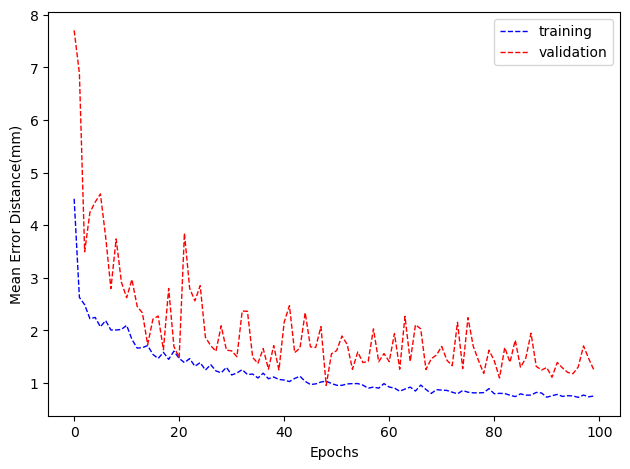

In [21]:
import matplotlib.pyplot as plt

epochs_100 = np.arange(0, 100)
plt.rcParams["figure.autolayout"] = True
plt.plot(epochs_100, training_res_epochs, linestyle='dashed', color='b', label="training", linewidth=1)
plt.plot(epochs_100, validation_res_epochs, linestyle='dashed', color='r', label="validation", linewidth=1)
plt.legend(loc='best')

plt.xlabel('Epochs')
plt.ylabel('Mean Error Distance(mm)')
plt.show()